In [1]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import squarify
from collections import defaultdict,Counter
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [3]:
data  = pd.read_csv('C:\\Users\\DELL\\OneDrive\\Desktop\\codesoft\\Project_2\\IMDb Movies India.csv',encoding='Latin-1')

In [4]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
data.shape

(15509, 10)

In [6]:
data.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


In [7]:
data.isnull().sum()


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
data['Year'].fillna(data['Year'].median(),inplace=True)
data['Rating'].fillna(data['Rating'].median(),inplace=True)
data.dropna(inplace=True)

In [9]:
data['MainGenre'] = data['Genre'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

In [10]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,MainGenre
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Comedy
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Drama
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Horror


In [11]:
data.shape

(5659, 11)

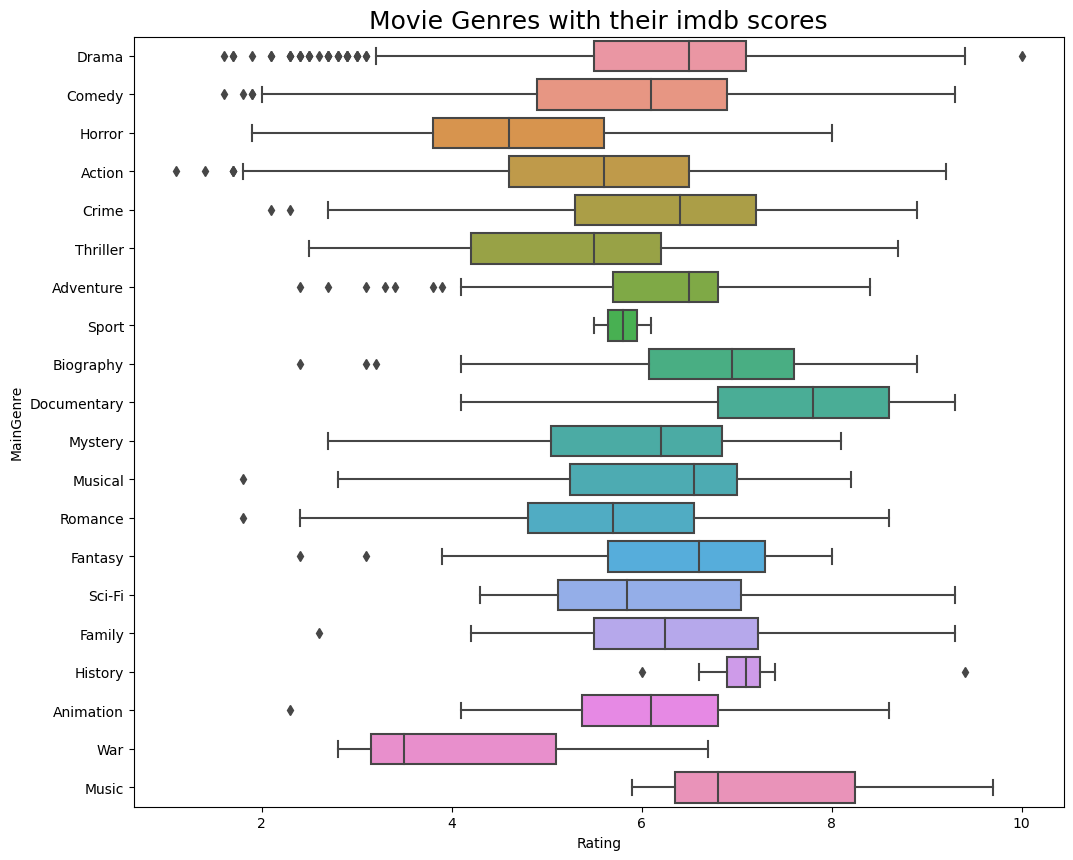

In [12]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Rating',y='MainGenre',data=data)
plt.title('Movie Genres with their imdb scores',fontsize=18)
plt.show()

In [13]:
data.columns


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3', 'MainGenre'],
      dtype='object')

In [14]:
numeric_cols = data.select_dtypes(include=np.number).columns
z_scores = np.abs((data[numeric_cols] - data[numeric_cols].mean()) / data[numeric_cols].std())
threshold = 3
data = data[(z_scores < threshold).all(axis=1)]

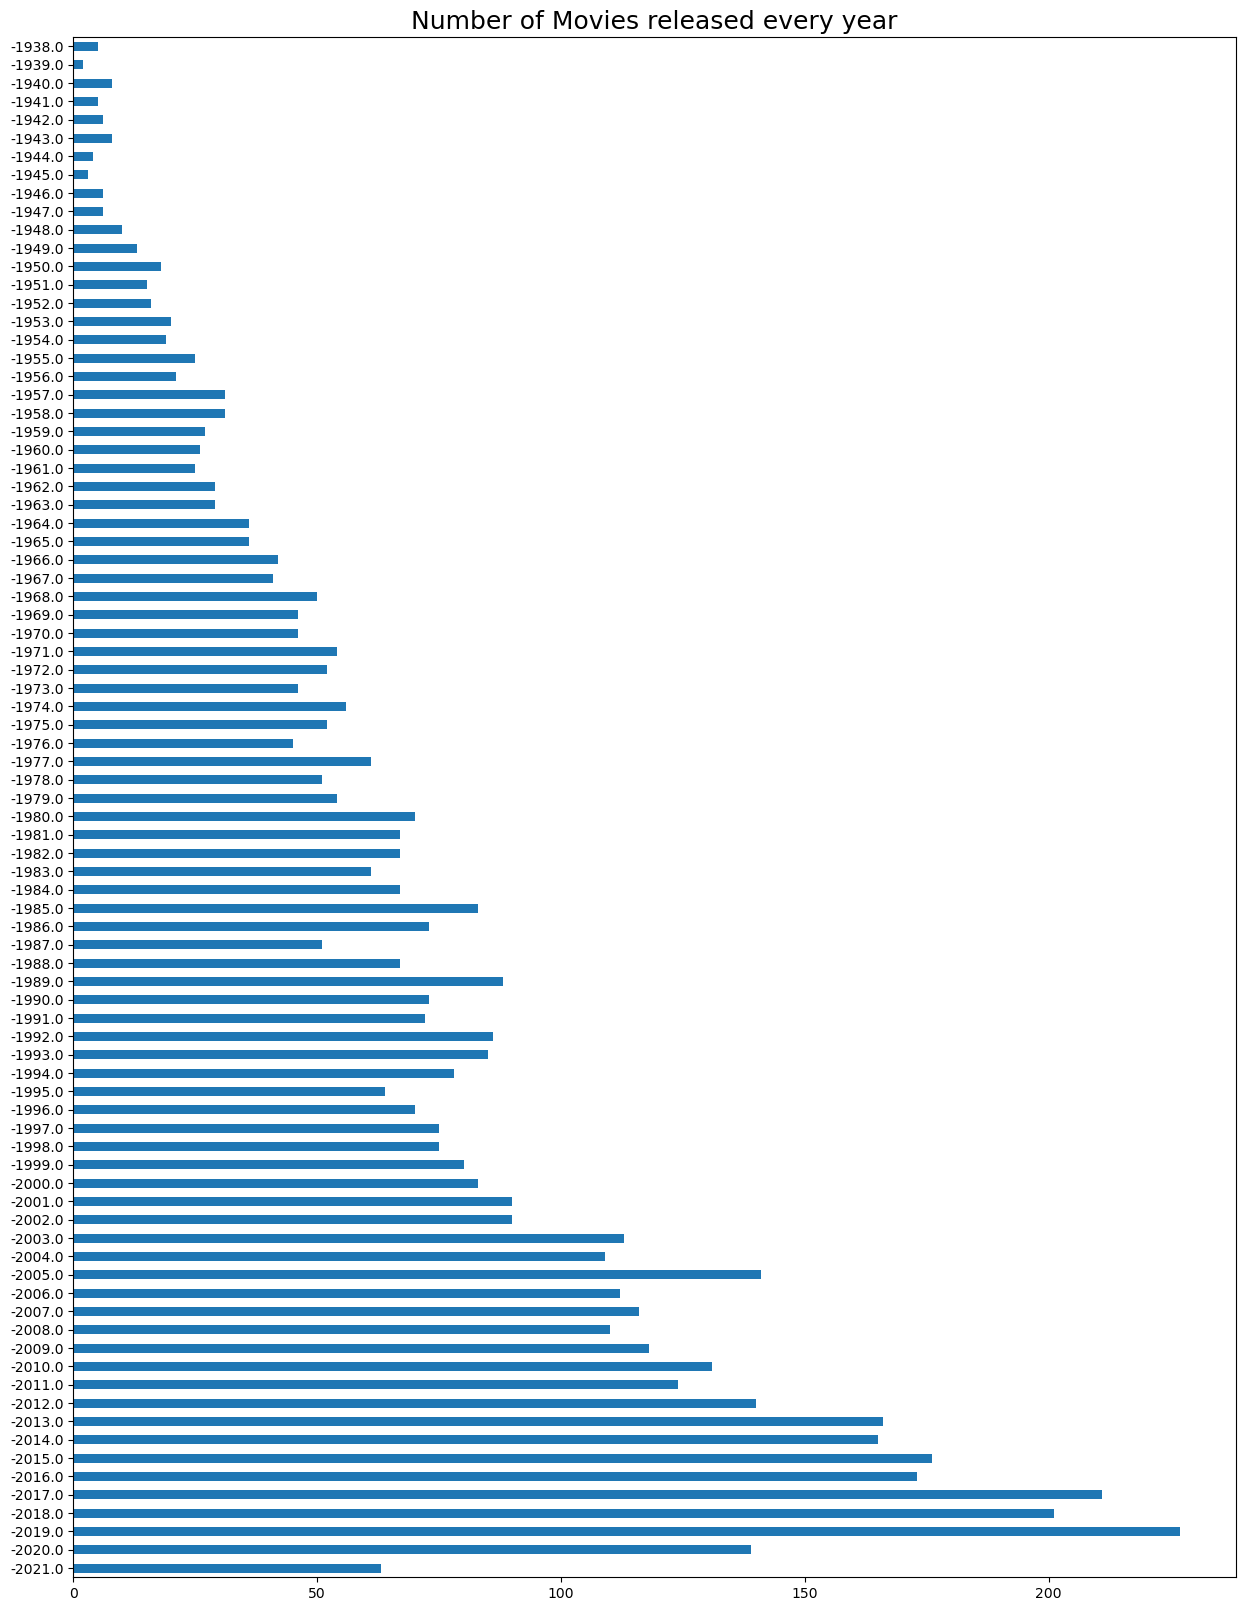

In [15]:
data.Year.value_counts(dropna=True).sort_index().plot(kind='barh',figsize=(15,20))
plt.title("Number of Movies released every year",fontsize=18)
plt.show()

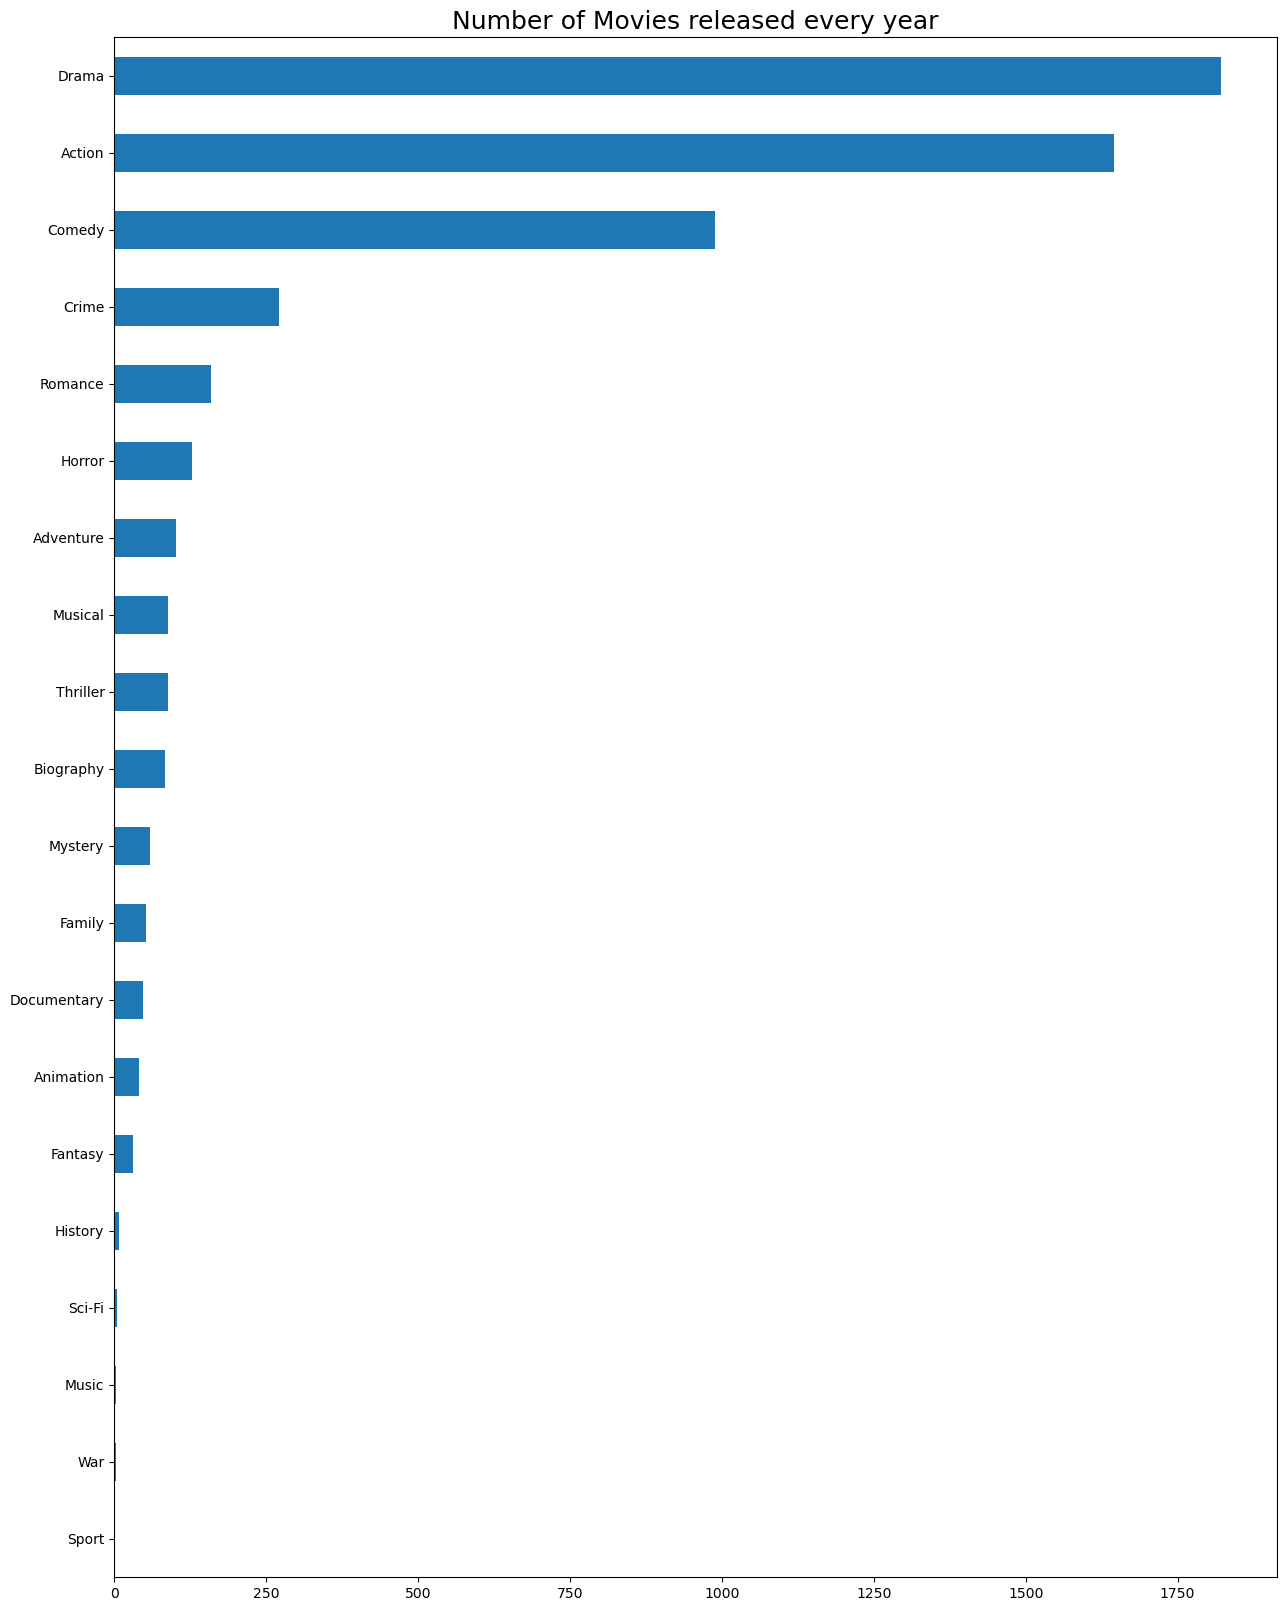

In [16]:
data.MainGenre.value_counts(dropna=True).sort_values().plot(kind='barh',figsize=(15,20))
plt.title("Number of Movies released every year",fontsize=18)
plt.show()

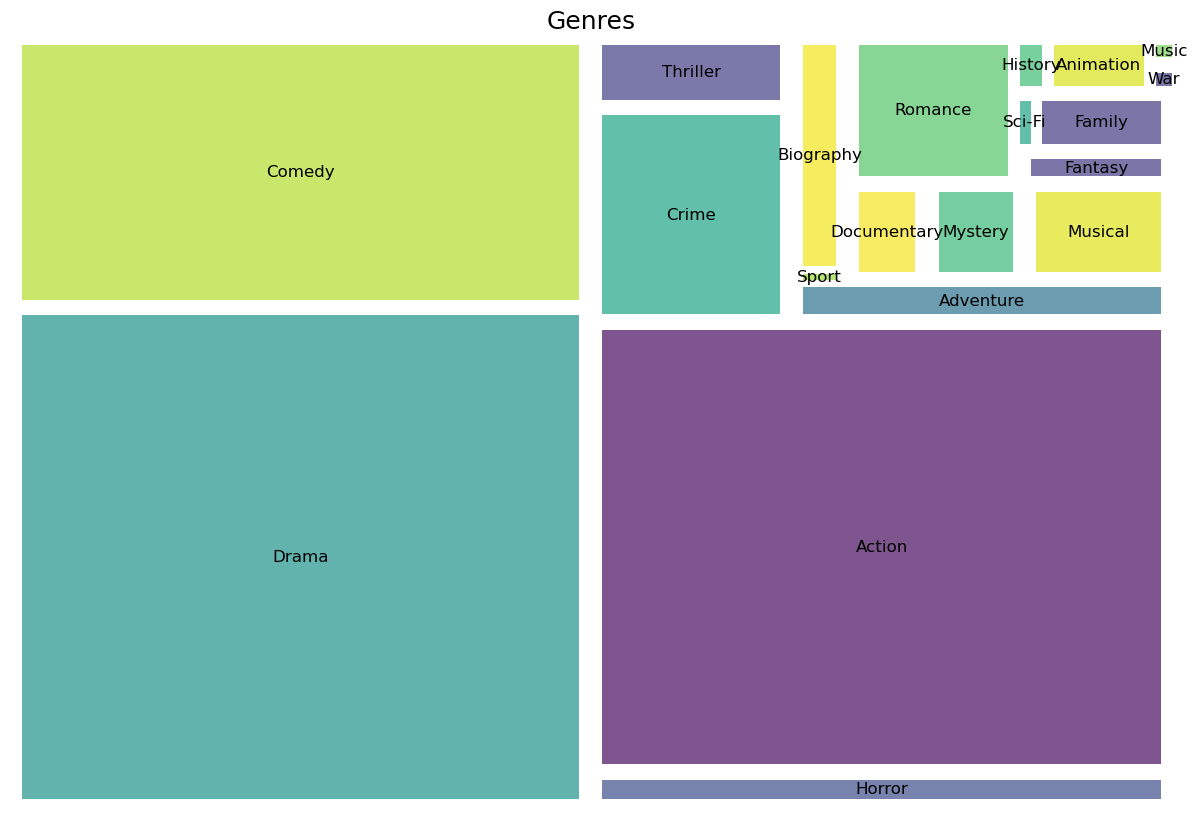

In [17]:
plt.figure(figsize=(15, 10))
squarify.plot(Counter(data['MainGenre']).values(),label=Counter(data['MainGenre']).keys(),text_kwargs={'fontsize':12}
             ,bar_kwargs={'alpha':.7},pad=True)
plt.title("Genres",fontsize=18)
plt.axis("off")
plt.show()

In [18]:
# Movies with the lowest Imdb rating 
data[data['Rating']==1.1]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,MainGenre


In [19]:
# Movie with the highest Imdb rating
data[data['Rating']==10]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,MainGenre
8339,Love Qubool Hai,-2020.0,94 min,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari,Drama


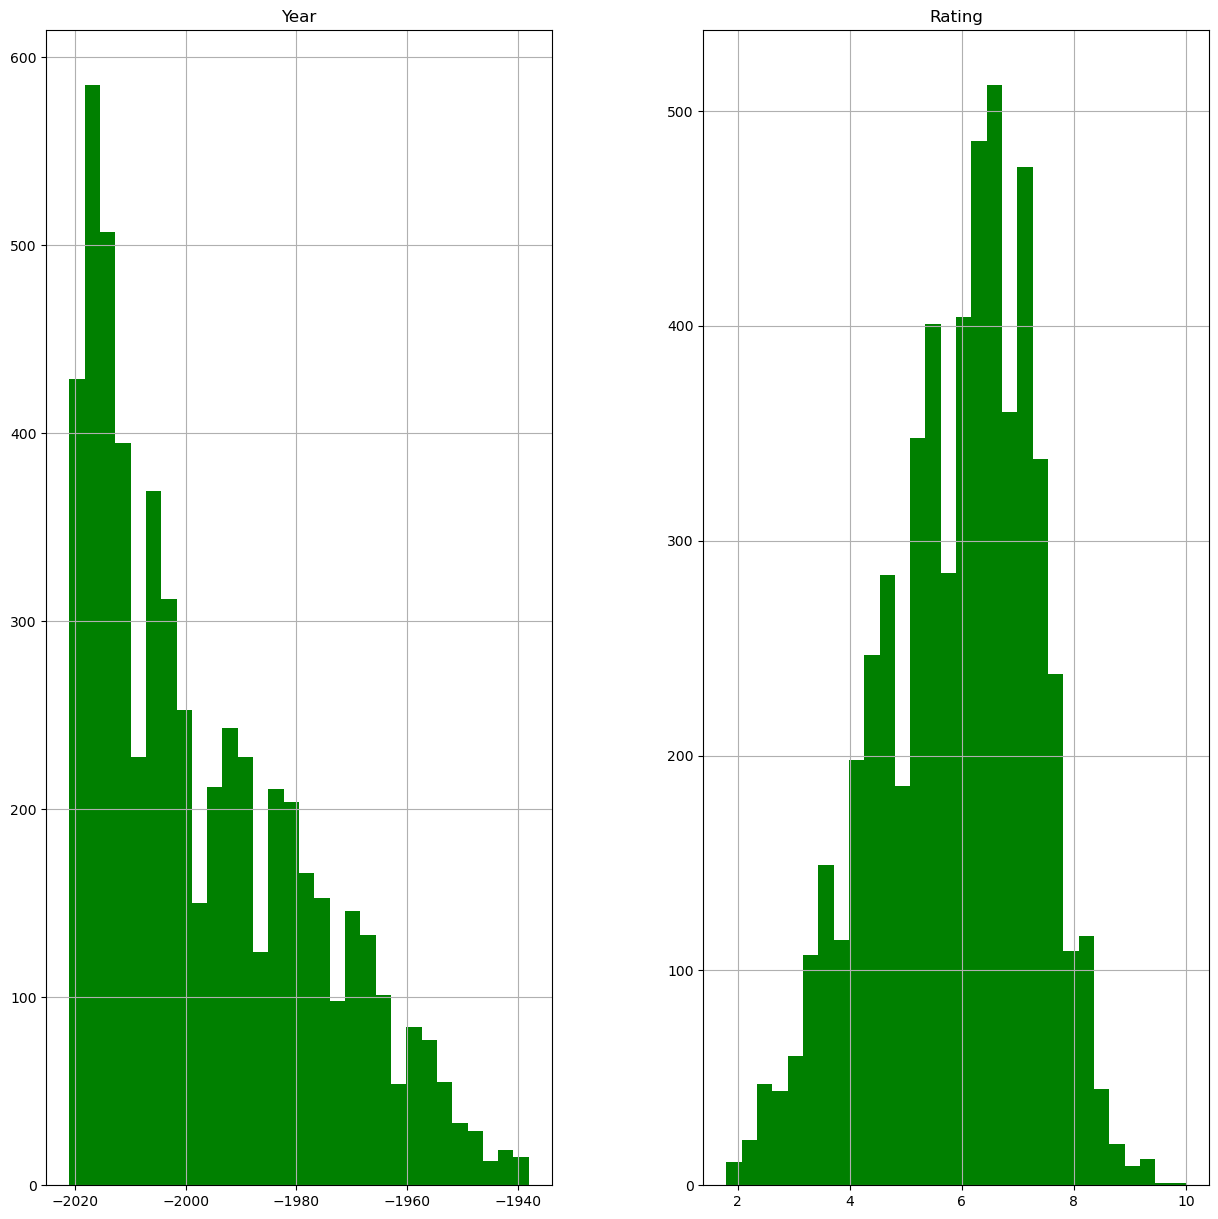

In [20]:
data.hist(bins=30,figsize=(15,15),color='g')
plt.show()

In [21]:
data['num_genres'] = data.Genre.apply(lambda x: len(x.split(',')))

In [22]:
data.sample(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,MainGenre,num_genres
9751,My Faraway Bride,-2006.0,95 min,"Comedy, Drama, Romance",4.7,617,Rajeev Virani,Jason Lewis,Kashmira Shah,Gulshan Grover,Comedy,3
5771,Hope Aur Hum,-2018.0,96 min,"Comedy, Drama, Family",6.3,414,Sudip Bandyopadhyay,Naseeruddin Shah,Kabir Sajid,Virti Vaghani,Comedy,3


In [23]:
data.num_genres.max()

3

In [24]:
data[data.num_genres==3].head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,MainGenre,num_genres
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Comedy,3
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Drama,3
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Horror,3
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,Action,3
12,100 Days,-1991.0,161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,Horror,3


C:\Users\DELL\AppData\Local\Temp\ipykernel_10076\207600389.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,linewidths=.5,


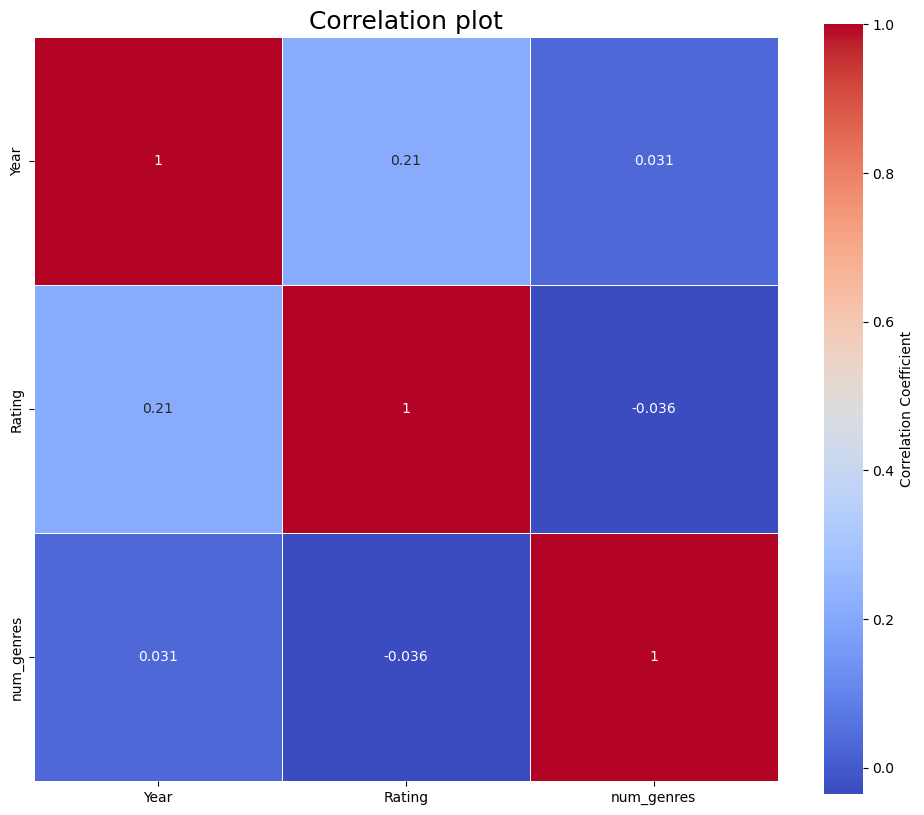

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,linewidths=.5,
            cmap='coolwarm',square=True,cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation plot",fontsize=18)
plt.show()

In [26]:
data['Duration'] = data['Duration'].str.replace('min', '')

In [27]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,MainGenre,num_genres
1,#Gadhvi (He thought he was Gandhi),-2019.0,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,1
3,#Yaaram,-2019.0,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,2
5,...Aur Pyaar Ho Gaya,-1997.0,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Comedy,3
6,...Yahaan,-2005.0,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Drama,3
8,?: A Question Mark,-2012.0,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Horror,3


In [28]:
data = data.drop(['Name','Genre','Director','Actor 1','Actor 2','Actor 3'],axis=1)

In [29]:
X = data[['Duration','Votes','Year']]
y = data['Rating']

In [30]:
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.2,random_state=32)

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)
pred_lm= lm.predict(X_test)
print("Mean squared error using linear regression",mean_squared_error(y_test,pred_lm))
print("Mean absolute error using linear regression",mean_absolute_error(y_test,pred_lm))

In [ ]:
dtc = DecisionTreeRegressor()
dtc.fit(X_train, y_train)
pred_dt = dtc.predict(X_test)
print("Mean squared error using Decision Tree Regression",mean_squared_error(y_test,pred_dt))
print("Mean absolute error using Decision Tree regression",mean_absolute_error(y_test,pred_dt))

In [ ]:
svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)
pred_svr = svr.predict(X_test)
print("Mean squared error using Support Vector regression",mean_squared_error(y_test,pred_svr))
print("Mean absolute error using Support Vector regression",mean_absolute_error(y_test,pred_svr))

In [ ]:
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
print("Mean squared error using KNN regression",mean_squared_error(y_test,pred_knn))
print("Mean absolute error using KNN regression",mean_absolute_error(y_test,pred_knn))

In [ ]:
data  = data = pd.read_csv('C:\\Users\\DELL\\OneDrive\\Desktop\\codesoft\\Project_2\\IMDb Movies India.csv',encoding='Latin-1')

In [ ]:
data = data.dropna(subset=['Rating'])

In [ ]:
data['Genre'].fillna('Unknown', inplace=True)
data['Director'].fillna('Unknown', inplace=True)
data['Actor 1'].fillna('Unknown', inplace=True)
data['Actor 2'].fillna('Unknown', inplace=True)
data['Actor 3'].fillna('Unknown', inplace=True)

In [ ]:
X = data[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = data['Rating']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline  # Make sure to import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [ ]:
## Load the dataset
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

# Print the column names to check for any discrepancies
print("Column names in the dataframe:", df.columns.tolist())

# Drop rows with missing target variable (Rating)
df = df.dropna(subset=['Rating'])

# Strip any leading or trailing whitespace in the column names
df.columns = df.columns.str.strip()

# Fill missing categorical data with 'Unknown'
df['Genre'].fillna('Unknown', inplace=True)
df['Director'].fillna('Unknown', inplace=True)
df['Actor 1'].fillna('Unknown', inplace=True)
df['Actor 2'].fillna('Unknown', inplace=True)
df['Actor 3'].fillna('Unknown', inplace=True)

In [ ]:
# Define features and target
X = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = df['Rating']

In [ ]:
# Verify column names again after processing
print("Columns in X:", X.columns.tolist())

# Preprocessing pipeline for categorical data
categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

# Ensure these columns exist
missing_cols = [col for col in categorical_features if col not in X.columns]
if missing_cols:
    print(f"Missing columns: {missing_cols}")
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Create a preprocessing and modeling pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the model
model.fit(X_train, y_train)

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")